<a href="https://colab.research.google.com/github/anjuli0802/OIBSIP-TASK_3_CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING/blob/main/carPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Collection

In [2]:
#reading the data
car_data = pd.read_csv("/content/car_data[1].csv")

##Data Preprocessing

In [3]:
#displaying first 5 rows of dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#displaying last 5 rows of dataset
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
#displaying the number of rows and columns present in the data
car_data.shape

(301, 9)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##Data Analysis

In [7]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


##Evaluation Of Missing Values

In [8]:
#checking for missing value
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##Data Visualisation

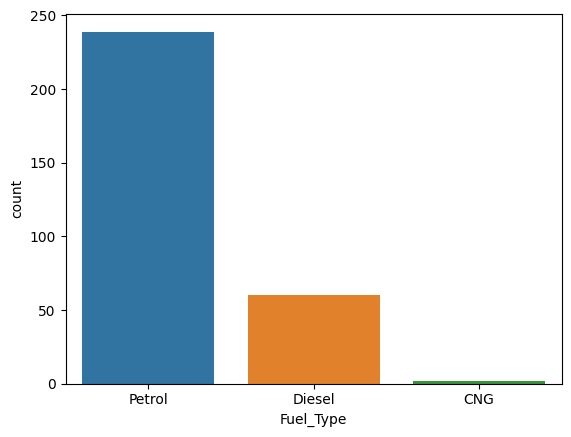

In [9]:
#creating countplot for 'Fuel_Type' column
sns.countplot(x = 'Fuel_Type', data = car_data);

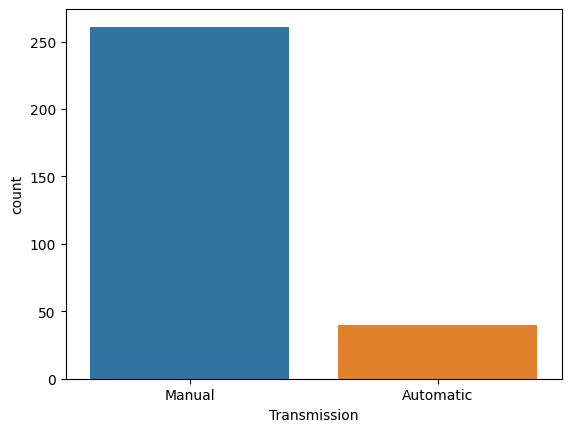

In [10]:
#creating countplot for 'Transmission' column
sns.countplot(x = 'Transmission', data = car_data);

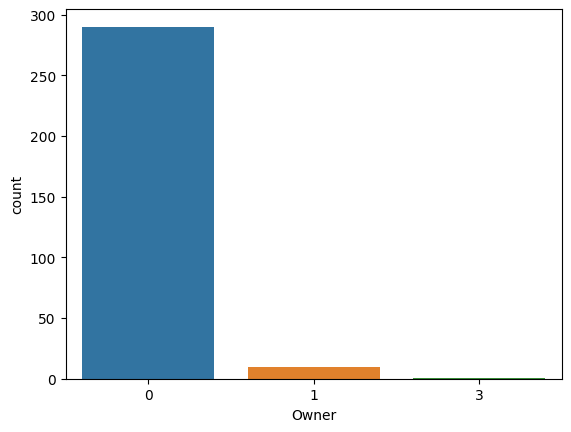

In [11]:
#creating countplot for 'Owner' column
sns.countplot(x = 'Owner', data = car_data);

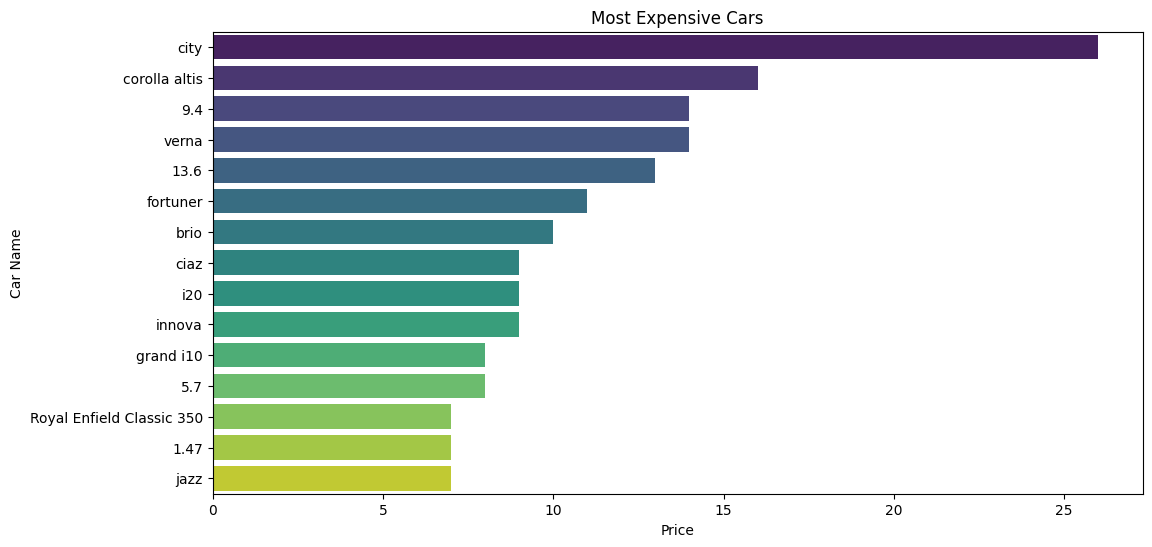

In [15]:
car = pd.concat([car_data['Car_Name'],car_data['Present_Price']])
car_count = car.value_counts().reset_index()
car_count.columns = ['Car Name', 'Price']
plt.figure(figsize = (12,6))
sns.barplot(x = 'Price', y = 'Car Name', data = car_count.head(15), palette = 'viridis')
plt.xlabel("Price")
plt.ylabel("Car Name")
plt.title("Most Expensive Cars")
plt.show();

##Checking For Outliers

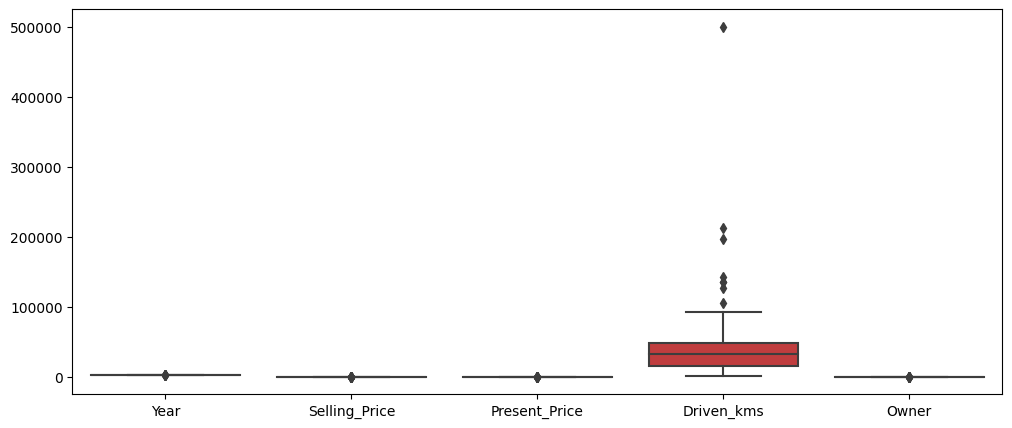

In [17]:
plt.figure(figsize = (12,5))
sns.boxplot(car_data);

##Handling Outliers

In [48]:
car_data['Driven_kms'].loc[car_data['Driven_kms'] > 650000] = 50000

<ipython-input-48-719fa239bed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['Driven_kms'].loc[car_data['Driven_kms'] > 650000] = 50000


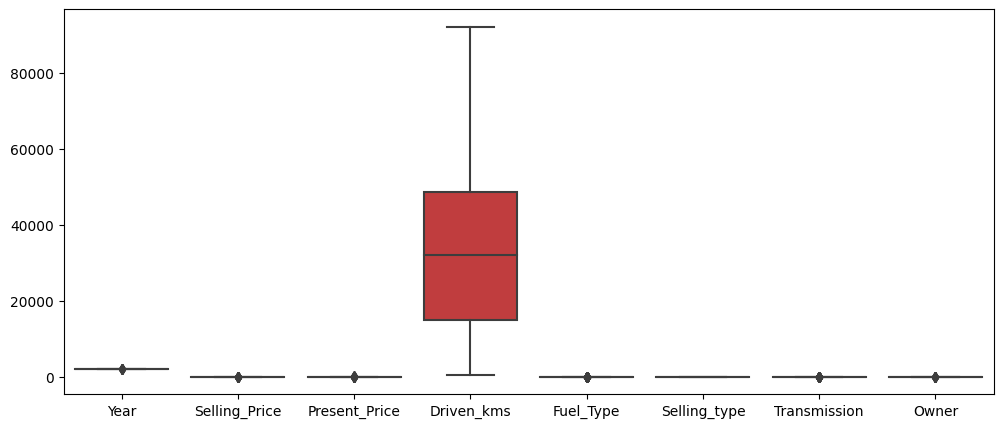

In [50]:
plt.figure(figsize = (12,5))
sns.boxplot(car_data);

Performing Encoding


In [24]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [25]:
print(car_data['Fuel_Type'].unique())
print(car_data['Selling_type'].unique())
print(car_data['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [26]:
car_data['Fuel_Type'].replace(to_replace = 'Petrol', value = 0, inplace = True)
car_data['Fuel_Type'].replace(to_replace = 'Diesel', value = 1, inplace = True)
car_data['Fuel_Type'].replace(to_replace = 'CNG', value = 2, inplace = True)

In [27]:
print(car_data['Fuel_Type'].unique())

[0 1 2]


In [28]:
car_data['Selling_type'].replace(to_replace = 'Dealer', value = 0, inplace = True)
car_data['Selling_type'].replace(to_replace = 'Individual', value = 1, inplace = True)
car_data['Selling_type'].unique()

array([0, 1])

In [29]:
car_data['Transmission'].replace(to_replace = 'Manual', value = 0, inplace = True)
car_data['Transmission'].replace(to_replace = 'Automatic', value = 1, inplace = True)
car_data['Transmission'].unique()

array([0, 1])

In [30]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


##Splitting The Data

In [31]:
#importing dependencies
from sklearn.model_selection import train_test_split

In [32]:
#initialising the values of x and y
y = car_data['Selling_Price']
x = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)

In [33]:
#displaying x
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [34]:
#displaying y
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##Model Training

In [59]:
#importing LinearRegression module
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train, y_train)

LinearRegression()

##r2 score and mse check


In [58]:
#importing dependencies
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
y_train_pred = model.predict(x_train)

In [41]:
#displaying r2_score for 'training' data
train_score = r2_score(y_train, y_train_pred)
train_score

0.8821824587147267

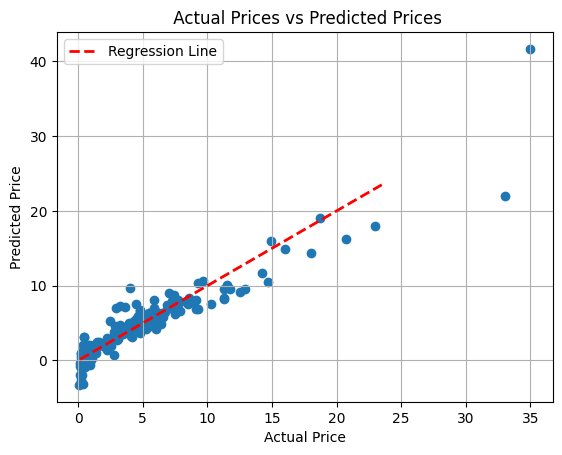

In [43]:
#plotting graph for actual v/s predicted price for 'training  data'
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.grid(True)
plt.show();

In [56]:
#displaying mean_squared_error for 'training' data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mse

2.8915530515522323

In [44]:
y_test_pred = model.predict(x_test)

In [45]:
#displaying r2_score for 'testing' data
test_score = r2_score(y_test, y_test_pred)
test_score

0.8873117818457653

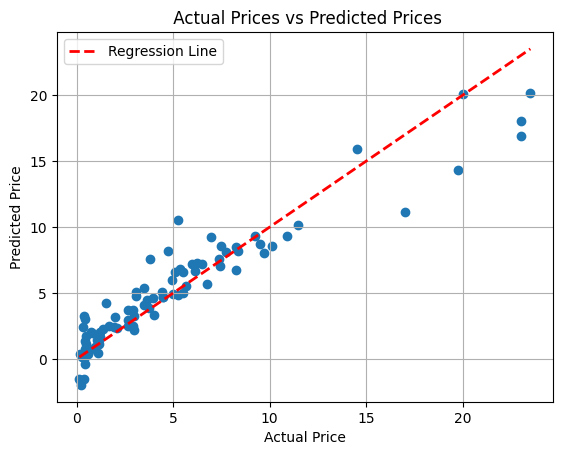

In [46]:
#plotting graph for actual v/s predicted price for 'testing  data'
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.grid(True)
plt.show();train_mse = mean_squared_error(y_train, y_train_pred)
train_mse

In [57]:
#displaying mean_squared_error for 'testing' data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mse

3.2087069266859234